<a href="https://colab.research.google.com/github/finloop/programowanie-liniowe/blob/main/Program-liniowy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programowanie liniowe z pomocą Python'a
 Ten notebook ma na celu pokazanie jak można rozwiązywać program liniowy z pomocą biblioteki `SciPy`. Zaczniemy od rozwiązania przykładowego zadania oraz pokazania w jaki sposób interpretować wyniki zwracane przez program.





## Program liniowy w SciPy
Z dokumentacji biblioteki `SciPy` odczytać możemy w jakiej postaci przyjmuje ona problemy w postaci: $$\min_x \ c^T x \\  
A_{ub} x \leq b_{ub},\\ 
A_{eq} x = b_{eq},\\ 
l \leq x \leq u$$
Gdzie:
*   $\min_x \ c^T x$ to funkcja celu
*   $x$ to wektor zmiennych decyzyjnych
*   $c^T$ to macierz transponowana do macierzy jednokolumnowej C tzn. $c^T = [c_1, \dots , c_n]$
*   $A_{ub}$ - wiersze macierzy ograniczeń dla, których ograniczenie jest w postaci $\leq$
*   $b_{ub}$ - ograniczenia górne dla wierszy $A_{ub}$
*   $A_{eq}$ - wiersze macierzy ograniczeń dla, których ograniczenie jest w postaci $ = $
*   $b_{eq}$ - ograniczenia dla wierszy $A_{eq}$
*   $l$ dolne ograniczenie dla $x$ domyślnie $0$

Można zauważyć, że nie każdy problem tak od razu będzie można rozwiązać z pomocą `SciPy` (niektóre będą wymagały przekształceń), ale zaletą jest to, że wszystkie dane podajemy w postaci macierzy, które posiadaja bardzo rozbudowany interfejs w Pythonie.


## Przykładowe zadanie
Rozważmy następujący program liniowy:
$$\begin{cases} -2x_1 + 4x_2 \rightarrow max  \\
2x_1 + 3x_2 \geq 3 \\
-4x_1 + 2x_2 \leq 5 \\
0 \leq x_1, x_2   \end{cases} $$
Sprowadzam go do problemu minimalizacji:
$$\begin{cases} 2x_1 - 4x_2 \rightarrow min  \\
-2x_1 - 3x_2 \leq -3 \\
-4x_1 + 2x_2 \leq 5 \\
0 \leq x_1, x_2   \end{cases} $$
zadanie w takiej formie możemy już przetworzyć z pomocą `SciPy`. Takie przekształcenie możemy wykonać z pomocą pythona, co znacznie przyspiesza pracę dla dużych macierzy.

In [ ]:
import numpy as np # Biblioteka obsługująca macierze
from scipy.optimize import linprog # Fukcja z SciPy do rozwiązywania programu liniowego

# Wprowadzenie macierzy kosztów
A_ub = np.array([[2, 3],
                 [-4, 2]])

# Pomnożenie pierwszego wiersza (w pythonie indeksujemy od 0) przez -1
A_ub[0, :] = A_ub[0,:] * -1

print(A_ub)

[[-2 -3]
 [-4  2]]


In [ ]:
# Wprowadzenie ograniczeń górnych
b_ub = np.array([3,5])

# Pomnożenie pierwszego elementu przez -1
b_ub[0] = b_ub[0] * -1
print(b_ub)

[-3  5]


In [ ]:
# Wprowadzenie wektora c
c = np.array([-2, 4])

# Przemnożenie wektora c przez -1
c = c * -1
print(c)

[ 2 -4]


In [ ]:
# Rozwiązanie
wynik = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
wynik 

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


     con: array([], dtype=float64)
     fun: -4313094417.980653
 message: 'The algorithm terminated successfully and determined that the problem is unbounded.'
     nit: 4
   slack: array([1.16918256e+10, 5.09231405e+09])
  status: 3
 success: False
       x: array([2.41628708e+09, 2.28641715e+09])

### Interpretacja wyniku
*    **con** różnica między $b_{eq} - A_{eq}x$
*    **fun** wartość funkcji celu
*    **messge** status zwrócony przez fukcję
*    **nit** ilość iteracji
*    **slack** różnica między $b_{ub} - A_{ub}x$
*    **status** jest to jedna z wartości:
    0. Optymalizacja zakończona sukcesem
    1. Przekroczono limit iteracji
    2. Problem jest sprzeczny
    3. Problem jest nieograniczony
    4. Problem z obliczeniami
*    **success** przyjmuje wartość `True` jeżeli znaleziono rozwiązanie optymalne
*    **x** wartości zmiennych decyzyjnych

Program twierdzi, że program linowy jest nieograniczony. Przykład ten zawiera wyłącznie dwie zmienne, możemy go zatem łatwo narysować.

### Rozwiązanie graficzne

Do narysowania wykresu wykorzystałem funkcję, która rysuje mi dowolną prostą w postaci ogólnej i na tej podstawie sprawdzę czy zadanie zostało rozwiązane poprawnie.


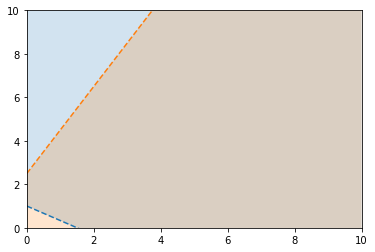

In [ ]:
import matplotlib.pyplot as plt   

def abline(A, B, C, between):
    """Rysuje linię w postaci ogólnej"""
    slope = -A/B
    intercept = -C/B
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
    # Wypełnienie wykresu pomiędzy prostą a `between`
    if between:
      plt.fill_between(x_vals, y_vals, between, alpha=0.2)

lim = 10

plt.xlim((0,lim))
plt.ylim((0,lim))

abline(2,3,-3,lim)
abline(-4,2,-5,-lim)  


Aby sprawdzić wynik, rysował będę kolejne warstwice i na ich podstawie 

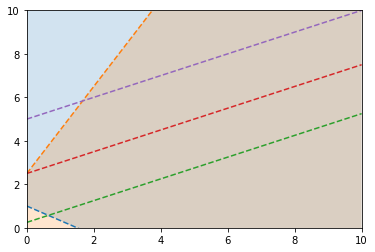

In [ ]:
plt.xlim((0,lim))
plt.ylim((0,lim))

abline(2,3,-3,lim)
abline(-4,2,-5,-lim)  

# Kolejne warstwice
abline(-2,4,-1,None) # Zielona 
abline(-2,4,-10,None) # Czerwona
abline(-2,4,-20,None) # Fioletowa

# Rozwiązywanie problemu w postaci kanonicznej

Dla zadania w postaci kanonicznej będziemy korzystać wyłącznie z części:
$$\min_x \ c^T x \\  
A_{eq} x = b_{eq},\\ 
0 \leq x $$



## Przykładowe zadanie
Rozważmy program liniowy w postaci kanonicznej zapisany w następujący sposób:
$$\begin{cases}-2 x_1 + -1x_2 \rightarrow min, \\
3x_1 + 4x_2 = 5,  \\
5x_1 + 5x_2 + x_3 = 10,  \\
x_1 + x_4 = 20,  \\
x_1 + 2x_2 + x_5 = 20,  \\
x_1,x_2, x_3,x_4 ,x_5 \geq 0
\end{cases}$$
Jego rozwiązanie wygląda następująco:

In [ ]:
A = np.array([[3, 4, 0, 0, 0],
              [5, 5, 1, 0, 0],
              [1, 0, 0, 1, 0],
              [1, 2, 0, 0, 1]])

b = np.array([5, 10, 20, 20])

c = np.array([-2, -1, 0, 0, 0])

wynik2 = linprog(c, A_eq=A, b_eq=b, method='simplex')
wynik2

     con: array([0., 0., 0., 0.])
     fun: -3.3333333333333335
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 1.66666667,  0.        ,  1.66666667, 18.33333333, 18.33333333])

# Zagadnienie transportowe
Z pomocą SciPy i linprog możemy rozwiązać także problem transporowy. Jednak wymagać to będzie przekształcenia macierzy kosztów to takiej, którą przyjmuje SciPy. 

Znanych jest $m$ dostawców pewnego produktu oraz $n$ jego odbiorców. Ponadto znane są dodatnie liczby:
$$a_i (i=1,...,m), b_j (j=1,...,n)$$ oraz macierz $$C=[c_{ij}]$$ o wymiarach $m$ x $n$. Liczby te oznaczają:
- $a_{i}$ - ilość produktu, jaką może dostarczyć i-ty dostawca
- $b_j$ - ilość produktu jaką powinien otrzymać j-ty odbiorca,
- $c_{ij}$ koszt transportu jednostki produktu od i-tego dostawcy do j-tego odbiorcy

Macierz $C=[c_{ij}]$ nazywamy macierzą jednostkowych kosztów transportu, zaś liczby
- $a_1,...a_m$ - zasobami dostawców
- $b_1,...,b_n$ - zapotrzebowaniami odbiorców.

Zadanie polega na znalezieniu układu przewozów minimalizującego łączny koszt transportu, przy założeniu, że:
1. Łączna ilość produktu wywiezionego od każego dostawcy (do wszystkich odborców) jest równa jego zasobowi,
2. Łącza ilość produktu przywiezionego do każdego odbiocy (od wszystkich dostawców) jest równa jego zapotrzebowaniu.

Aby zbudować model matematyczny zadania transportowego, wprowadzimy macierz zmiennych decyzyjnych $X = [x_{ij}]$ o wymiarac $m$ x $n$, gdzie $x_{ij}$ oznacza ilość produktu, jaka ma być do przewiezienia od i-tego dostawc do j-tego odbiorcy.

## Poszukiwanie rozwiązania optymalnego

| Dostawcy\Odbiorcy 	| 10 	| 20 	| 10 	| 5  	| 10 	| 20 	|
|-------------------	|----	|----	|----	|----	|----	|----	|
| 30                	| 5  	| 6  	| 9  	| 10 	| 15 	| 5  	|
| 10                	| 11 	| 15 	| 5  	| 12 	| 20 	| 8  	|
| 15                	| 7  	| 6  	| 32 	| 12 	| 8  	| 9  	|
| 20                	| 7  	| 3  	| 7  	| 4  	| 10 	| 11 	|

Zadanie jest zamknięte, możemy więc od razu przystąpić do rozwiązywania go. Rozwiążę je zamieniając to zadanie na program liniowy i skorzystam z SciPy.

In [ ]:
k = np.array([[5 ,6 ,9 ,10,15,5 ],
              [11,15,5 ,12,20,8 ],
              [7 ,6 ,32,12,8 ,9 ],
              [7 ,3 ,7 ,4 ,10,11]
])
k # Macierz kosztu przewozu

array([[ 5,  6,  9, 10, 15,  5],
       [11, 15,  5, 12, 20,  8],
       [ 7,  6, 32, 12,  8,  9],
       [ 7,  3,  7,  4, 10, 11]])

Wprowadzam ograniczenia dostawców i odbiorców:

In [ ]:
d = np.array([30,10,15,20]) # Ograniczenia dostawców
o = np.array([10,20,10,5,10,20]) # Ograniczenia odbiorców

b = np.concatenate([d, o]) # Ograniczenie dla A
b

array([30, 10, 15, 20, 10, 20, 10,  5, 10, 20])

Tworzę funkcję celu:

In [ ]:
c = k.flatten() # Funkcja celu
c

array([ 5,  6,  9, 10, 15,  5, 11, 15,  5, 12, 20,  8,  7,  6, 32, 12,  8,
        9,  7,  3,  7,  4, 10, 11])

Macierzy w ten sposób nie jesteśmy w stanie przetworzyć bezpośrednio. Skorzystam więc z transformacji po której zadanie będzie nadawało się do przetworzenia przez algorytm simplex.



In [ ]:
n = len(o) # Liczba odbiorców
m = len(d) # Liczba dostawców

A = np.zeros((n+m, n*m))

for i in range(0, m):
  for j in range(0, n): 
    A[i,j + i*n] = 1
    A[m + j,j +i*n] = 1
    
print(A)

[[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]


In [ ]:
wynikT = linprog(c, A_eq=A, b_eq=b, method='simplex')
wynikT

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
     fun: 375.0
 message: 'Optimization terminated successfully.'
     nit: 17
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([10.,  0.,  0.,  0.,  0., 20.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
        5.,  0.,  0., 10.,  0.,  0., 15.,  0.,  5.,  0.,  0.])

| Dostawcy\Odbiorcy 	| 10 	| 20 	| 10 	| 5  	| 10 	| 20 	|
|-------------------	|----	|----	|----	|----	|----	|----	|
| 30                	| 5  	| 6  	| 9  	| 10 	| 15 	| 5  	|
| 10                	| 11 	| 15 	| 5  	| 12 	| 20 	| 8  	|
| 15                	| 7  	| 6  	| 32 	| 12 	| 8  	| 9  	|
| 20                	| 7  	| 3  	| 7  	| 4  	| 10 	| 11 	|

In [ ]:
w = wynikT.x.reshape((m,n))
print(w)
print(k)

[[10.  0.  0.  0.  0. 20.]
 [ 0.  0. 10.  0.  0.  0.]
 [ 0.  5.  0.  0. 10.  0.]
 [ 0. 15.  0.  5.  0.  0.]]
[[ 5  6  9 10 15  5]
 [11 15  5 12 20  8]
 [ 7  6 32 12  8  9]
 [ 7  3  7  4 10 11]]


In [ ]:
w * k

array([[ 50.,   0.,   0.,   0.,   0., 100.],
       [  0.,   0.,  50.,   0.,   0.,   0.],
       [  0.,  30.,   0.,   0.,  80.,   0.],
       [  0.,  45.,   0.,  20.,   0.,   0.]])

In [ ]:
np.sum(w * k)

375.0